In [3]:
# https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/
# Identify the apparels (Fashion MNIST)
import pandas as pd
import numpy as np
from glob import glob
import cv2
#pip install opencv-python
#https://datahack.analyticsvidhya.com/contest/practice-problem-identify-the-apparels/#ProblemStatement
images = [cv2.imread(file) for file in glob('train/*.png')]

In [4]:
images = np.array(images)
images.shape

(60000, 28, 28, 3)

In [5]:
image = []
for i in range(0,60000):
    img = images[i].flatten()
    image.append(img)
image = np.array(image)

In [6]:
train = pd.read_csv("trainID.csv")     # Give the complete path of your train.csv file
feat_cols = [ 'pixel'+str(i) for i in range(image.shape[1]) ]
df = pd.DataFrame(image,columns=feat_cols)
df['label'] = train['label']

In [7]:
from sklearn.decomposition import FactorAnalysis
FA = FactorAnalysis(n_components = 3).fit_transform(df[feat_cols].values)

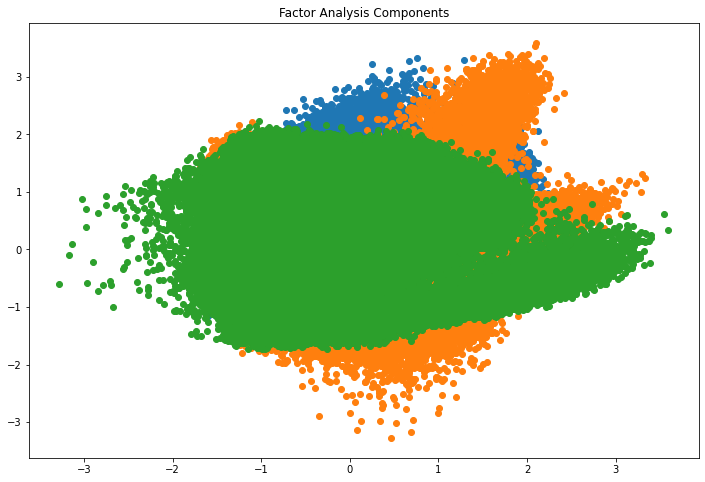

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.title('Factor Analysis Components')
plt.scatter(FA[:,0], FA[:,1])
plt.scatter(FA[:,1], FA[:,2])
plt.scatter(FA[:,2],FA[:,0])

<Figure size 432x288 with 0 Axes>

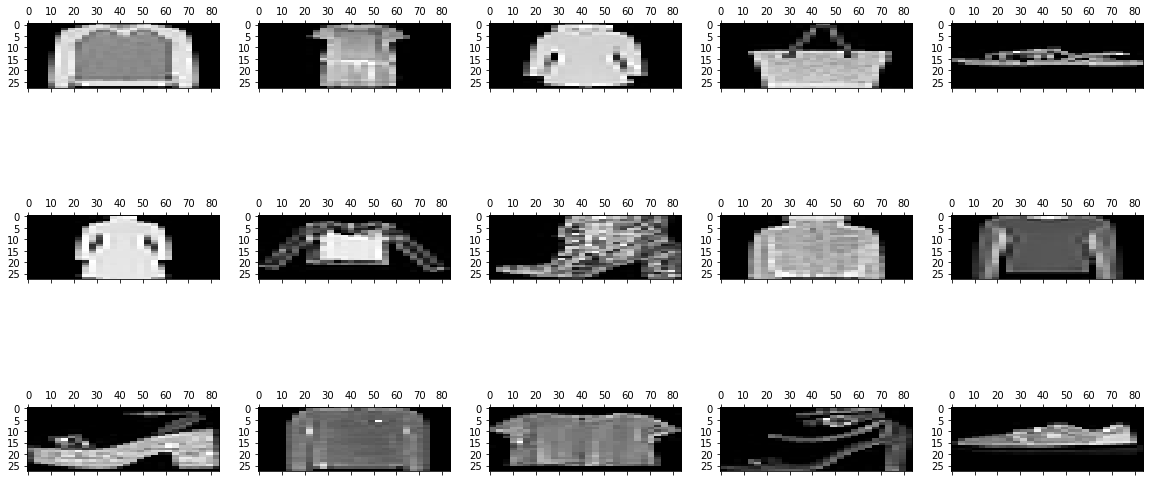

In [10]:
rndperm = np.random.permutation(df.shape[0])
plt.gray()
fig = plt.figure(figsize=(20,10))
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1)
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28*3)).astype(float))

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(df[feat_cols].values)

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

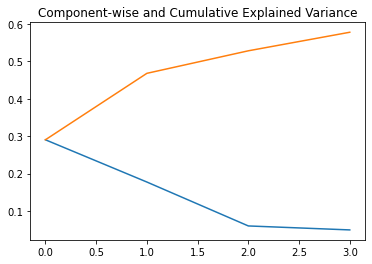

In [12]:
plt.plot(range(4), pca.explained_variance_ratio_)
plt.plot(range(4), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")

Text(0.5, 0.98, '4-Component PCA')

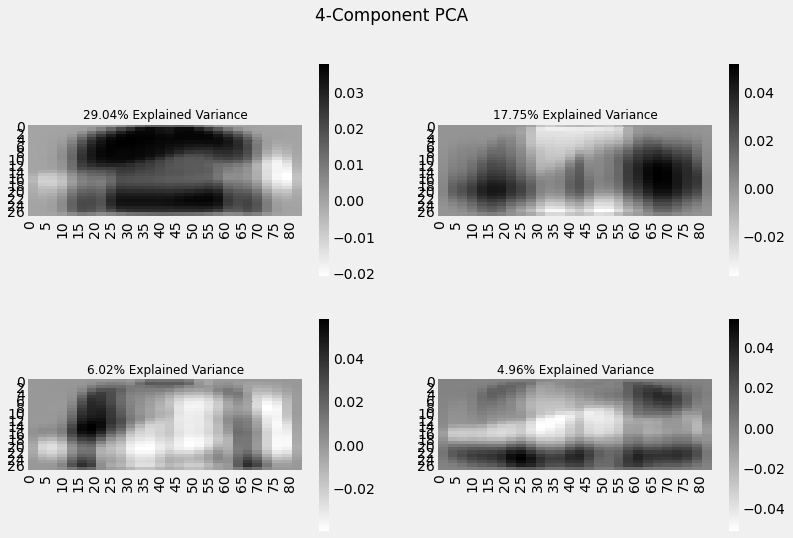

In [13]:
import seaborn as sns
plt.style.use('fivethirtyeight')
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))
sns.heatmap(pca.components_[0, :].reshape(28, 84), ax=axarr[0][0], cmap='gray_r')
sns.heatmap(pca.components_[1, :].reshape(28, 84), ax=axarr[0][1], cmap='gray_r')
sns.heatmap(pca.components_[2, :].reshape(28, 84), ax=axarr[1][0], cmap='gray_r')
sns.heatmap(pca.components_[3, :].reshape(28, 84), ax=axarr[1][1], cmap='gray_r')
axarr[0][0].set_title(
"{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[0]*100),
fontsize=12
)
axarr[0][1].set_title(
"{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[1]*100),
fontsize=12
)
axarr[1][0].set_title(
"{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[2]*100),
fontsize=12
)
axarr[1][1].set_title(
"{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[3]*100),
fontsize=12
)
axarr[0][0].set_aspect('equal')
axarr[0][1].set_aspect('equal')
axarr[1][0].set_aspect('equal')
axarr[1][1].set_aspect('equal')

plt.suptitle('4-Component PCA')

In [14]:
from sklearn.decomposition import TruncatedSVD 
svd = TruncatedSVD(n_components=3, random_state=42).fit_transform(df[feat_cols].values)

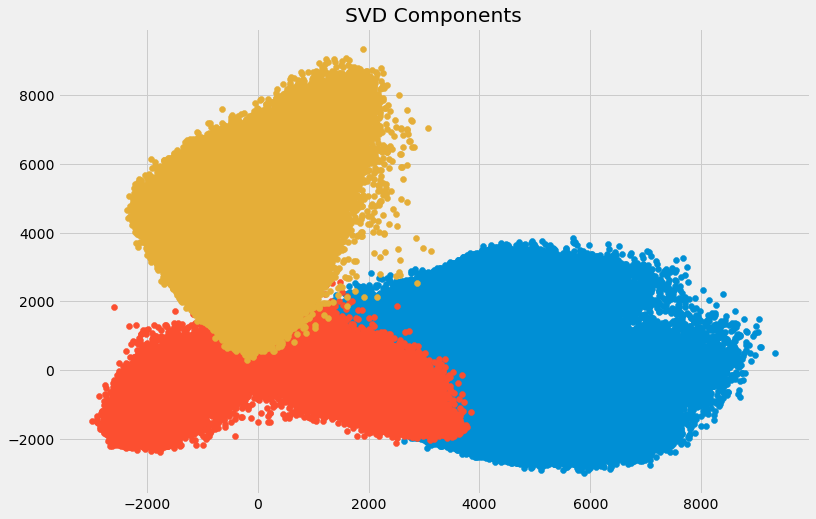

In [15]:
plt.figure(figsize=(12,8))
plt.title('SVD Components')
plt.scatter(svd[:,0], svd[:,1])
plt.scatter(svd[:,1], svd[:,2])
plt.scatter(svd[:,2],svd[:,0])

In [16]:
from sklearn.decomposition import FastICA 
ICA = FastICA(n_components=3, random_state=12) 
X=ICA.fit_transform(df[feat_cols].values)

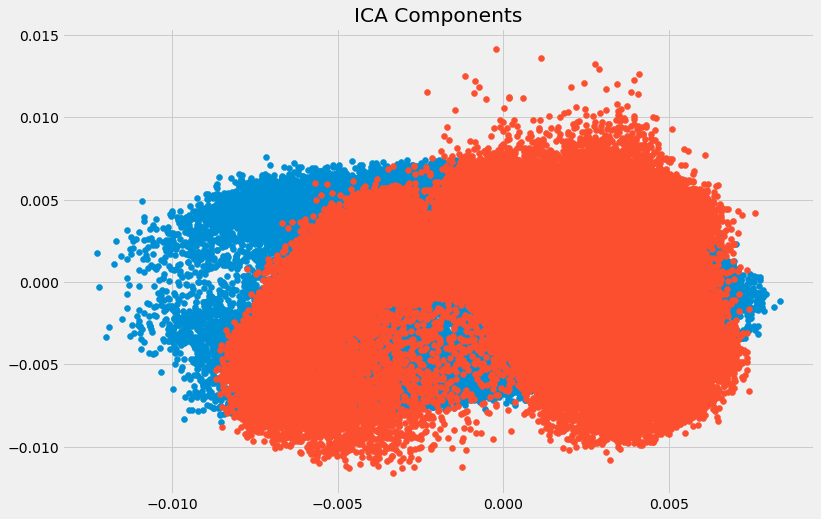

In [17]:
plt.figure(figsize=(12,8))
plt.title('ICA Components')
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[:,1], X[:,2])
#plt.scatter(X[:,2], X[:,0])

In [18]:
from sklearn import manifold 
trans_data = manifold.Isomap(n_neighbors=5, n_components=3, n_jobs=-1).fit_transform(df[feat_cols][:6000].values)

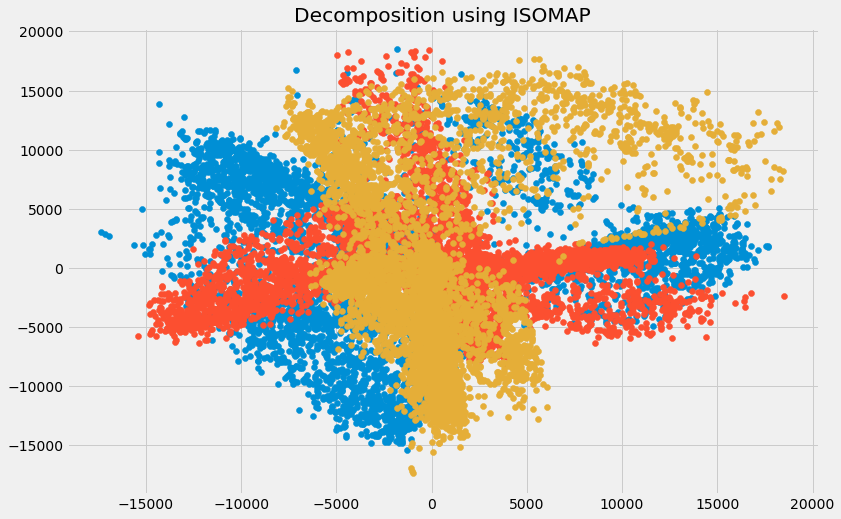

In [19]:
plt.figure(figsize=(12,8))
plt.title('Decomposition using ISOMAP')
plt.scatter(trans_data[:,0], trans_data[:,1])
plt.scatter(trans_data[:,1], trans_data[:,2])
plt.scatter(trans_data[:,2], trans_data[:,0])

In [20]:
from sklearn.manifold import TSNE 
tsne = TSNE(n_components=3, n_iter=300).fit_transform(df[feat_cols][:6000].values)

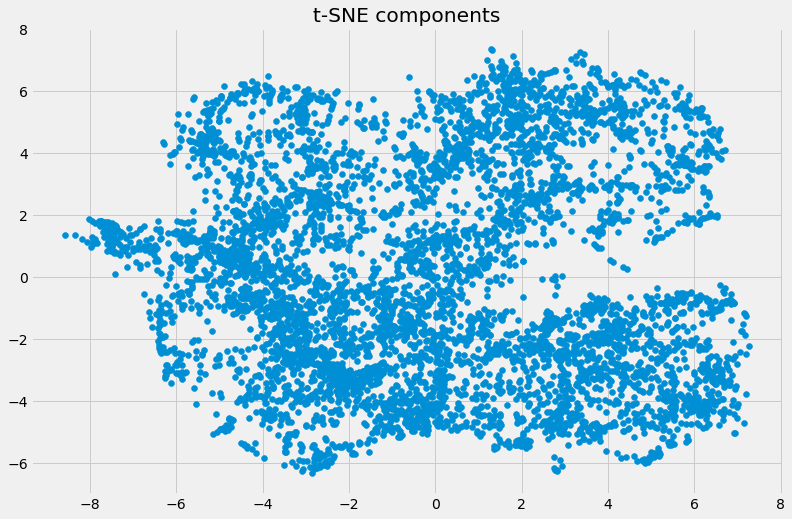

In [21]:
plt.figure(figsize=(12,8))
plt.title('t-SNE components')
plt.scatter(tsne[:,0], tsne[:,1])
#plt.scatter(tsne[:,1], tsne[:,2])
#plt.scatter(tsne[:,2], tsne[:,0])

In [22]:
import umap
umap_data = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=3).fit_transform(df[feat_cols][:6000].values)

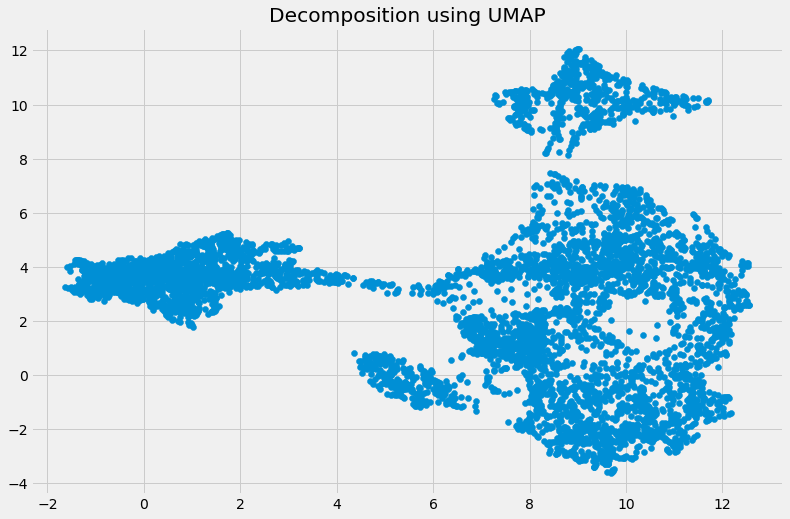

In [23]:
plt.figure(figsize=(12,8))
plt.title('Decomposition using UMAP')
plt.scatter(umap_data[:,0], umap_data[:,1])
#plt.scatter(umap_data[:,1], umap_data[:,2])
#plt.scatter(umap_data[:,2], umap_data[:,0])